In [27]:
import numpy as np
import matplotlib.pyplot as plt

from math import ceil
from skimage.filters import gabor_kernel

In [28]:
loss = np.load('gabor_tryexcept_0loss.npy')
loss

array([[131.5297   ],
       [117.93733  ],
       [109.63835  ],
       ...,
       [ -1.6857377],
       [ -2.0378478],
       [ -2.1320922]], dtype=float32)

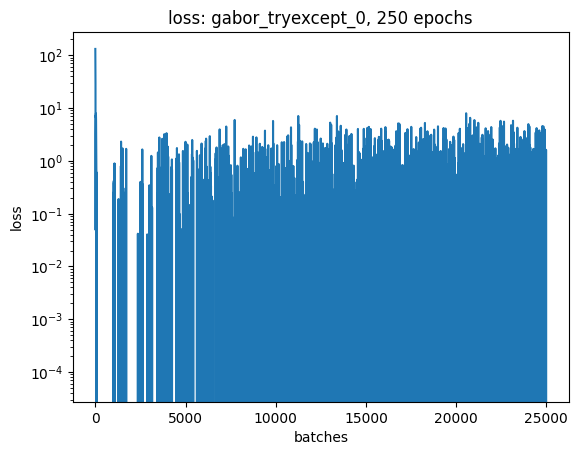

In [29]:
plt.figure()
plt.plot(loss)
plt.yscale('log')
plt.title(f"loss: gabor_tryexcept_0, 250 epochs")
plt.ylabel("loss")
plt.xlabel("batches")
plt.savefig(f"lossgabor_tryexcept_0_log.pdf")

In [21]:
def scale_rgb(x):
    return (x - x.min()) / (x.max() - x.min())

# crop images to image_dim x image_dim
image_dim = 224

frequency = 0.006
theta = 0.0
kernel = gabor_kernel(frequency, theta=theta)

input_height, input_width = kernel.shape

# Calculate cropping boundaries
crop_top = (input_height - image_dim) // 2
crop_bottom = crop_top + image_dim
crop_left = (input_width - image_dim) // 2
crop_right = crop_left + image_dim

# Perform the crop
weights = np.real(kernel)[crop_top:crop_bottom, crop_left:crop_right]

# scale weights
weights = scale_rgb(weights)

Text(0.5, 1.0, 'ground truth gabor filter')

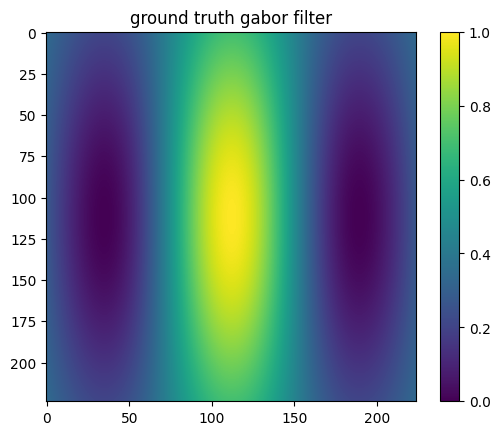

In [25]:
plt.figure()
plt.imshow(weights)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar()
plt.title('ground truth gabor filter')
# plt.savefig(f"example_gabor.pdf")

In [26]:
200*.05

10.0